# Apply generalized Lotka Volterra on the miaSim simualtion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from clv.compositional_lotka_volterra import *
from clv.generalized_lotka_volterra import *

## Load Data

In [2]:
# path of data file
filename = f"miaSim_glv_4species_new.csv"
filepath = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/MScThesis/explore/data/final_datasets/"

In [3]:
# function to import the datafile and put it into the right format
def create_data():
    ts_all = []
    data_all = []
    names_all = []
    data = pd.read_csv(f"{filepath}{filename}", sep=",", header=0)
    names = list(data.columns)[1:]
    usol = data.to_numpy()
    ts = usol[:, 0]
    data_y = usol[:, 1:]
    ts_all.append(ts)
    data_all.append(data_y)
    names_all.append(names)
    print(f"shape of the dataset", data_y.shape)
    # set dimensions of the dataset
    global n_samples, n_taxa
    n_samples, n_taxa = data_y.shape
    return ts_all, data_all, names_all

In [4]:
T, Y, Names = create_data()

U = [ np.zeros((x.shape[0], 1)) for x in Y ]

shape of the dataset (151, 4)


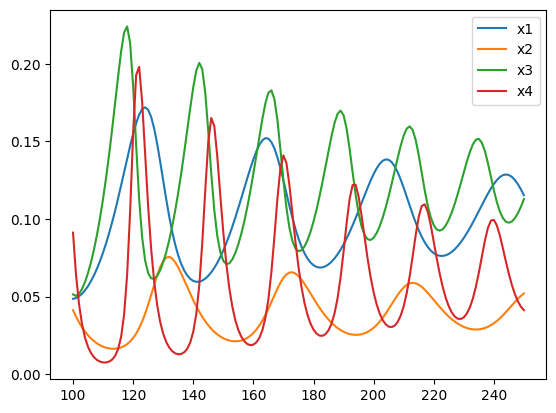

In [5]:
fig, ax = plt.subplots()
for i in np.arange(n_taxa):
    ax.plot(T[0], Y[0][:,i], label = f"x{i+1}")
ax.legend()

In [6]:
P = []
Y_pc = []
log_Y = []
for y in Y:
    mass = y.sum(axis=1)
    p = y / y.sum(axis=1,keepdims=True)
    p = (p + 1e-5) / (p + 1e-5).sum(axis=1,keepdims=True)
    P.append(p)
    Y_pc.append((mass.T*p.T).T)
    log_Y.append(np.log(mass.T*p.T).T)

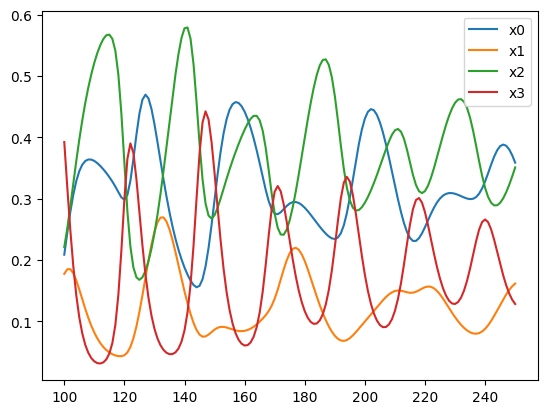

In [7]:
# plot P
fig, ax = plt.subplots()
for i in np.arange(n_taxa):
    ax.plot(T[0], P[0][:,i], label = f"x{i}")
ax.legend()

## Generalized Lotka Volterra

In [8]:
glv = GeneralizedLotkaVolterra(C=Y, T=T, U=None, denom_ids=None)

#### Using elastic net

In [9]:
# glv.train()

In [10]:
# glv.get_params()
# glv.C

#### Using ridge regularisation

In [11]:
glv.train_ridge()

	r (0.125, 0.125, 0) sqr error 2.3059145297262535
	r (0.5, 2, 0) sqr error 2.3016663429774065
	r (0.5, 4, 0) sqr error 2.289622303811456
	r (0.5, 8, 0) sqr error 2.277921692412398
	r (1, 4, 0) sqr error 2.2635753721316623
	r (1, 8, 0) sqr error 2.233959216053375
	r (2, 8, 0) sqr error 2.204027762762589
	r (4, 8, 0) sqr error 2.1856050688649784
	r (8, 8, 0) sqr error 2.1753400215618424


In [12]:
A_glv, g_glv, B_glv = glv.get_params()

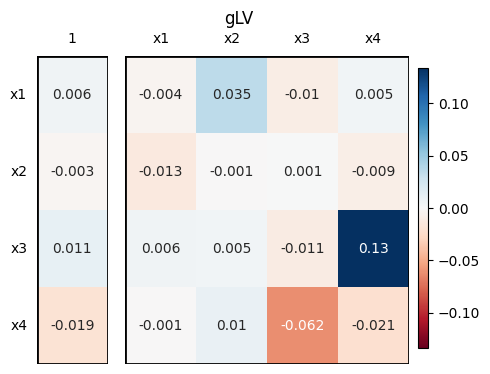

In [13]:
plot_heatmaps(A_glv.transpose(), g_glv, n_taxa, title = "gLV")

plt.savefig('C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/coeff_heatmaps_miaSim_gLV.png',
             dpi = 300, bbox_inches='tight')

In [14]:
# A = round(pd.DataFrame(glv.A), 3)

# # make heatmap
# fig, ax = plt.subplots()
# sns.heatmap(A, fmt="", cmap="RdBu", center=0, vmin = -max_value, vmax = max_value, annot=True, yticklabels=False)
# ax.xaxis.tick_top()
# ax.tick_params(left=False, top=False)
# plt.show()

In [15]:
t = np.arange(len(T[0]))
T[0]

array([100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 227., 228., 229., 230., 231.,
       232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242.,
       243., 244., 245., 246., 247., 248., 249., 25

In [16]:
pred = glv.predict(c0 = np.array([Y[0][0, :]]), times = T[0])

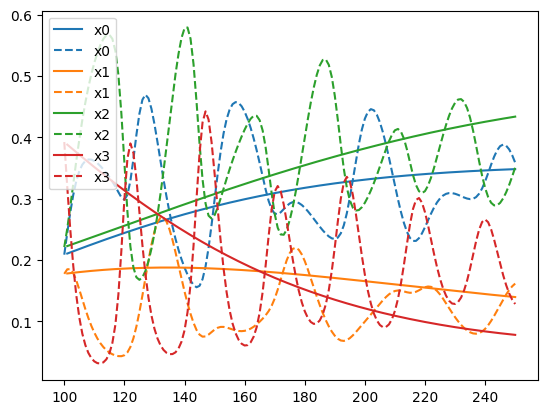

In [17]:
# plot P
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots()
for i in np.arange(n_taxa):
    ax.plot(T[0][1:], pred[1:,i], label = f"x{i}", color = colors[i])
    ax.plot(T[0], P[0][:,i], label = f"x{i}", color = colors[i], linestyle='--')
ax.legend()

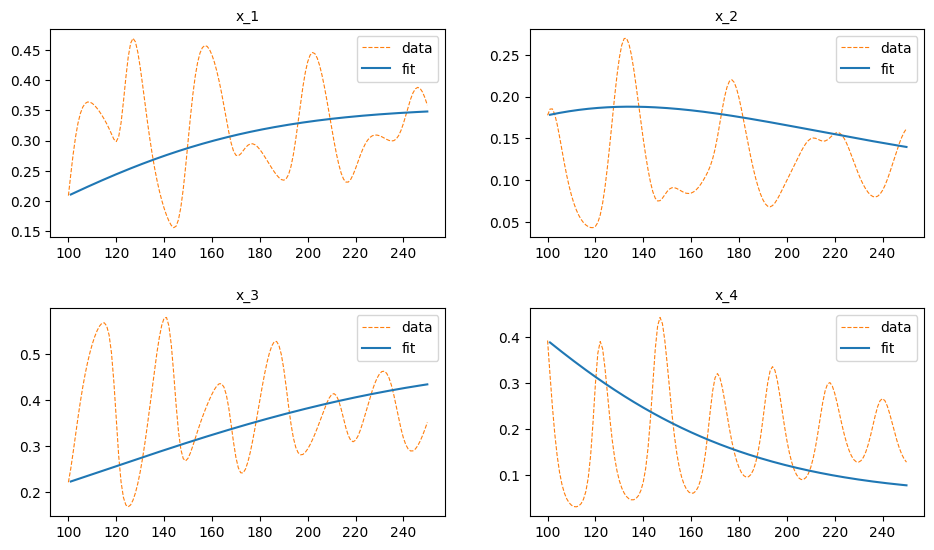

In [18]:
n_row = 2
n_col = 2

fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout(pad=3.0)

for i in np.arange(n_taxa):
    # plot each taxon timeline separately
    axs[math.floor(i/n_col), (i%n_col)].plot(T[0], P[0][:,i], linewidth = 0.8, 
                                             color = colors[1], linestyle='--', label = "data")
    axs[math.floor(i/n_col), (i%n_col)].plot(T[0][1:], pred[1:,i], label = "fit")
    axs[math.floor(i/n_col), (i%n_col)].set_title(f"{Names[0][i]}")
    axs[math.floor(i/n_col), (i%n_col)].legend()
    axs[math.floor(i/n_col), (i%n_col)].title.set_size(10)
    # axs[math.floor(i/n_col), (i%n_col)].set_ylim([-0.01, 1.01])

# # remove last (empty) plot from grid
# fig.delaxes(axs[math.floor(n_taxa/n_col), (n_taxa%n_col)])

## Ground truth vector g and matrix A

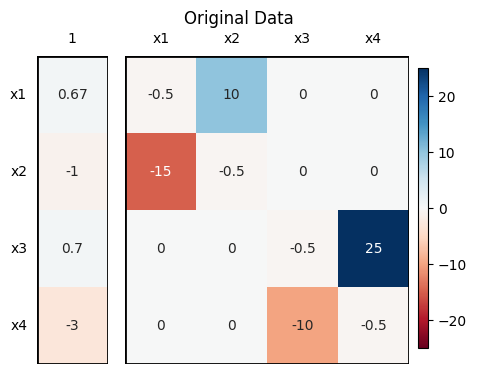

In [19]:
g_org = np.array([2/3, -1, 0.7, -3])
A_org = np.array([[-0.5, 10, 0, 0], 
                  [-15, -0.5, 0, 0],
                  [0, 0, -0.5, 25],
                  [0, 0, -10, -0.5]])

plot_heatmaps(A_org, g_org, n_taxa, title="Original Data")

plt.savefig('C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/coeff_heatmaps_miaSim_org.png',
             dpi = 300, bbox_inches='tight')

## Comparison to DeepMoD

In [20]:
deepmod_out = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster/batch_10-11_miaSimS4_new/output_batch_10-11_miaSimS4_new_run01_5_50_th0-01/"


coeffs_deepmod = pd.read_csv(f"{deepmod_out}Data/model_estimated_coeffs.csv", header=0, index_col=0)

g_deepmod = coeffs_deepmod.transpose()["x1*1"].values.reshape((n_taxa, 1))
A_deepmod = coeffs_deepmod.transpose().iloc[:, 1:5].to_numpy().transpose()

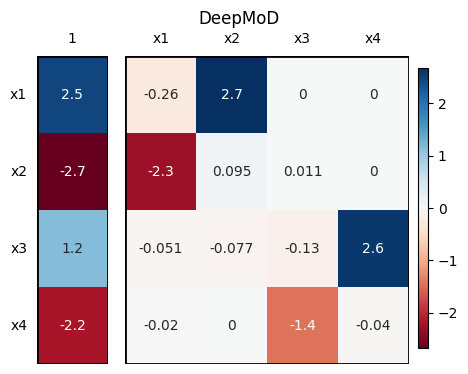

In [21]:
plot_heatmaps(A_deepmod, g_deepmod, n_taxa, title="DeepMoD")

plt.savefig('C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/coeff_heatmaps_miaSim_deepmod.png',
             dpi = 300, bbox_inches='tight')

## Result from NODEBNGM

In [22]:
node_out = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/MScThesis/R/NODEBNGM/output/out_miaSim_run07/"

coeffs_node = pd.read_csv(f"{node_out}effectsMat.csv", header=0).transpose()
weights_node = pd.read_csv(f"{node_out}weightsMat.csv", header=0).transpose()

A_node = coeffs_node.to_numpy() * weights_node.to_numpy()
A_node1 = coeffs_node.to_numpy()
A_node2 = weights_node.to_numpy()

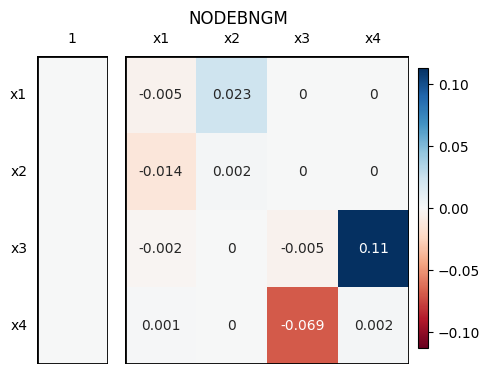

In [23]:
plot_heatmaps(A_node, g = None, n_taxa=n_taxa, title="NODEBNGM")

plt.savefig('C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/coeff_heatmaps_miaSim_NODEBNGM.png',
             dpi = 300, bbox_inches='tight')

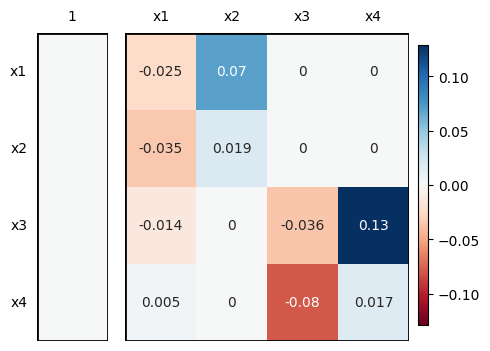

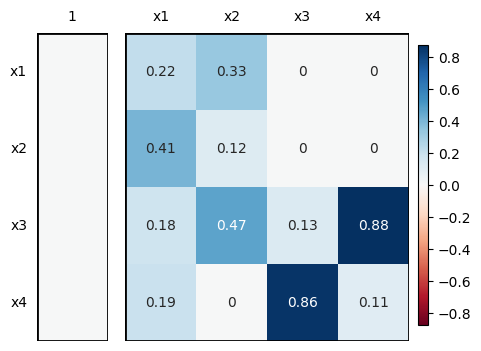

In [24]:
plot_heatmaps(A_node1, g = None, n_taxa=n_taxa)
plot_heatmaps(A_node2, g = None, n_taxa=n_taxa)

### Compare the three methods

In [25]:
# A_list = [A_org, A_glv, A_deepmod, A_node]
# g_list = [g_org, g_glv, g_deepmod, None]
# method_list = ["Original Data", "gLV", "DeepMoD", "NODEBNGM"]

# def plot_all(A_list, g_list, n_taxa):

#     fig = plt.figure(figsize=(11, 8))
#     gs = gridspec.GridSpec(2, 2)
    
#     # Adjust the space between the plots
#     plt.subplots_adjust(wspace=0.2, hspace=0.4)

#     axs = [plt.subplot(gs[i, j]) for i in range(2) for j in range(2)]
#     for i, (A, g, ax, method) in enumerate(zip(A_list, g_list, axs, method_list)):
#         plot_heatmap(A, g, ax, n_taxa, method)

# plot_all(A_list, g_list, n_taxa)

# # plt.savefig('C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/coeff_heatmaps_miaSim_comparison.png',
# #             dpi = 300, bbox_inches='tight')
# # plt.close()